# S&P 500 Data (from 2010-01-01 to 2021-06-11)

## Imports

In [1]:
import json
import pandas as pd

## Load the json file and convert to pandas dataframe

In [2]:
# primarily converts to a dict
with open('FS_sp500_Value.json', 'r') as json_file:
    json_data = json.load(json_file)
    
print(type(json_data))

<class 'dict'>


In [3]:
# then converts dict to a dataframe
sp_data = pd.DataFrame.from_dict(json_data)
sp_data.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
0,A,1262217600000,22.725323,22.124464,22.203148,22.224607,5224606.0,20.363510
1,A,1262563200000,22.625179,22.267525,22.453505,22.389128,3815561.0,20.514248
2,A,1262649600000,22.331903,22.002861,22.324751,22.145924,4186031.0,20.291416
3,A,1262736000000,22.174536,22.002861,22.067240,22.067240,3243779.0,20.219320
4,A,1262822400000,22.045780,21.816881,22.017166,22.038628,3095172.0,20.193102


In [4]:
sp_data['Date'] = pd.to_datetime(sp_data['Date'], origin='unix', unit='ms')
sp_data.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
0,A,2009-12-31,22.725323,22.124464,22.203148,22.224607,5224606.0,20.363510
1,A,2010-01-04,22.625179,22.267525,22.453505,22.389128,3815561.0,20.514248
2,A,2010-01-05,22.331903,22.002861,22.324751,22.145924,4186031.0,20.291416
3,A,2010-01-06,22.174536,22.002861,22.067240,22.067240,3243779.0,20.219320
4,A,2010-01-07,22.045780,21.816881,22.017166,22.038628,3095172.0,20.193102


## Airline data

In [5]:
airlines = sp_data[sp_data['Ticker'].isin(['ALK', 'AAL', 'DAL', 'LUV', 'UAL'])]
airlines.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
2881,AAL,2009-12-31,4.97,4.83,4.92,4.84,5268600.0,4.562870
2882,AAL,2010-01-04,4.94,4.66,4.84,4.77,9837300.0,4.496876
2883,AAL,2010-01-05,5.37,4.71,4.79,5.31,25212000.0,5.005957
2884,AAL,2010-01-06,5.38,5.00,5.19,5.09,16597900.0,4.798555
2885,AAL,2010-01-07,5.43,5.05,5.06,5.24,14033400.0,4.939965


In [6]:
airlines['Ticker'].unique()

array(['AAL', 'ALK', 'DAL', 'LUV', 'UAL'], dtype=object)

In [7]:
end_date = pd.to_datetime('2018-12-31')

airlines = airlines[airlines['Date'] > end_date]
airlines.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
5146,AAL,2019-01-02,32.650002,31.049999,31.459999,32.480000,5229500.0,31.963160
5147,AAL,2019-01-03,31.850000,28.809999,31.690001,30.059999,16822000.0,29.581665
5148,AAL,2019-01-04,32.090000,30.400000,30.440001,32.040001,9369600.0,31.530161
5149,AAL,2019-01-07,33.480000,31.240000,31.990000,32.950001,8010700.0,32.425678
5150,AAL,2019-01-08,33.650002,32.200001,33.360001,32.419998,7107700.0,31.904110


In [8]:
Alaska_Air_Group = airlines[airlines['Ticker']=='ALK']
American_Airlines_Group = airlines[airlines['Ticker']=='AAL']
Delta_Air_Lines = airlines[airlines['Ticker']=='DAL']
Southwest_Airlines = airlines[airlines['Ticker']=='LUV']
United_Airlines = airlines[airlines['Ticker']=='UAL']

Alaska_Air_Group = Alaska_Air_Group.rename(columns={'Close':'Alaska Close Value'})
American_Airlines_Group = American_Airlines_Group.rename(columns={'Close':'American Close Value'})
Delta_Air_Lines = Delta_Air_Lines.rename(columns={'Close':'Delta Close Value'})
Southwest_Airlines = Southwest_Airlines.rename(columns={'Close':'Southwest Close Value'})
United_Airlines = United_Airlines.rename(columns={'Close':'United Close Value'})

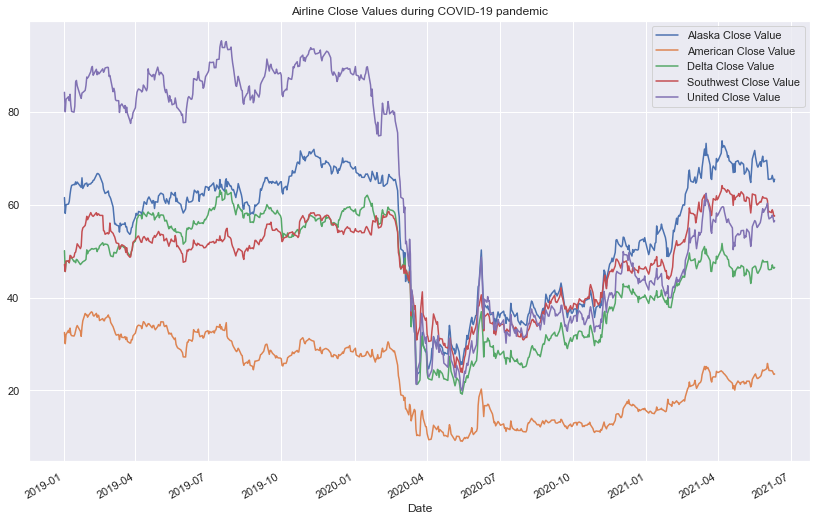

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(14, 9))
ax = plt.gca()
Alaska_Air_Group.plot(x='Date', y='Alaska Close Value', ax = ax)
American_Airlines_Group.plot(x='Date', y='American Close Value', ax = ax)
Delta_Air_Lines.plot(x='Date', y='Delta Close Value', ax = ax)
Southwest_Airlines.plot(x='Date', y='Southwest Close Value', ax = ax)
United_Airlines.plot(x='Date', y='United Close Value', ax = ax)
plt.title('Airline Close Values during COVID-19 pandemic')
plt.savefig('figures/airlines.png')
plt.show()

## Soft Drinks data

In [10]:
drinks = sp_data[sp_data['Ticker'].isin(['KO', 'MNST', 'PEP'])]
drinks.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
728561,KO,2009-12-31,28.875000,28.465000,28.790001,28.500000,10848800.0,18.649090
728562,KO,2010-01-04,28.610001,28.450001,28.580000,28.520000,13870400.0,18.662180
728563,KO,2010-01-05,28.495001,28.070000,28.424999,28.174999,23172400.0,18.436422
728564,KO,2010-01-06,28.219999,27.990000,28.174999,28.165001,19264600.0,18.429878
728565,KO,2010-01-07,28.184999,27.875000,28.165001,28.094999,13234600.0,18.384077


In [11]:
drinks['Ticker'].unique()

array(['KO', 'MNST', 'PEP'], dtype=object)

In [12]:
end_date = pd.to_datetime('2018-12-31')

drinks = drinks[drinks['Date'] > end_date]
drinks.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
730826,KO,2019-01-02,47.220001,46.560001,46.939999,46.930000,11603700.0,43.620419
730827,KO,2019-01-03,47.369999,46.529999,46.820000,46.639999,14714400.0,43.350868
730828,KO,2019-01-04,47.570000,46.639999,46.750000,47.570000,13013700.0,44.215286
730829,KO,2019-01-07,47.750000,46.900002,47.570000,46.950001,13135500.0,43.639008
730830,KO,2019-01-08,47.570000,47.040001,47.250000,47.480000,15420700.0,44.131630


In [13]:
Coca_Cola_Company = drinks[drinks['Ticker']=='KO']
Monster_Beverage = drinks[drinks['Ticker']=='MNST']
PepsiCo = drinks[drinks['Ticker']=='PEP']

Coca_Cola_Company = Coca_Cola_Company.rename(columns={'Close':'Coca-Cola Close Value'})
Monster_Beverage = Monster_Beverage.rename(columns={'Close':'Monster Beverage Close Value'})
PepsiCo = PepsiCo.rename(columns={'Close':'PepsiCo Close Value'})

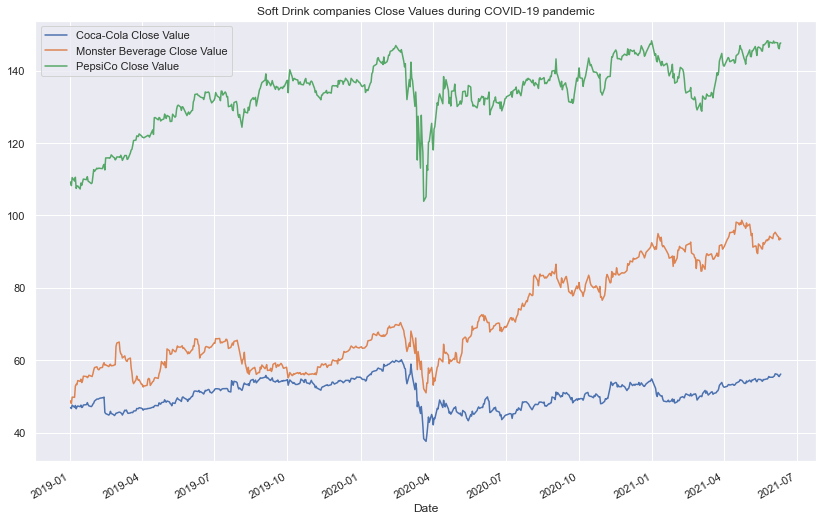

In [14]:
plt.figure(figsize=(14, 9))
ax = plt.gca()
Coca_Cola_Company.plot(x='Date', y='Coca-Cola Close Value', ax = ax)
Monster_Beverage.plot(x='Date', y='Monster Beverage Close Value', ax = ax)
PepsiCo.plot(x='Date', y='PepsiCo Close Value', ax = ax)
plt.title('Soft Drink companies Close Values during COVID-19 pandemic')
plt.savefig('figures/drinks.png')
plt.show()

## Casinos data

In [15]:
casinos = sp_data[sp_data['Ticker'].isin(['CZR', 'LVS', 'MGM', 'WYNN'])]
casinos.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
342177,CZR,2014-09-22,4.75,4.10,4.75,4.35,21900.0,4.35
342178,CZR,2014-09-23,4.45,3.90,4.45,4.26,81700.0,4.26
342179,CZR,2014-09-24,4.34,3.61,3.70,4.34,94400.0,4.34
342180,CZR,2014-09-25,4.44,3.80,4.35,4.00,29800.0,4.00
342181,CZR,2014-09-26,4.40,4.00,4.00,4.40,161500.0,4.40


In [16]:
casinos['Ticker'].unique()

array(['CZR', 'LVS', 'MGM', 'WYNN'], dtype=object)

In [17]:
end_date = pd.to_datetime('2018-12-31')

casinos = casinos[casinos['Date'] > end_date]
casinos.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
343254,CZR,2019-01-02,38.240002,34.639999,35.430000,37.950001,830500.0,37.950001
343255,CZR,2019-01-03,38.419998,36.720001,37.310001,37.380001,856200.0,37.380001
343256,CZR,2019-01-04,39.580002,36.869999,38.279999,39.450001,1066500.0,39.450001
343257,CZR,2019-01-07,41.180000,39.220001,39.869999,40.799999,1084500.0,40.799999
343258,CZR,2019-01-08,42.200001,40.570000,41.270000,42.180000,855900.0,42.180000


In [18]:
Caesars_Entertainment = casinos[casinos['Ticker']=='CZR']
Las_Vegas_Sands = casinos[casinos['Ticker']=='LVS']
MGM_Resorts_International = casinos[casinos['Ticker']=='MGM']
Wynn_Resorts = casinos[casinos['Ticker']=='WYNN']

Caesars_Entertainment = Caesars_Entertainment.rename(columns={'Close':'Caesars Entertainment Close Value'})
Las_Vegas_Sands = Las_Vegas_Sands.rename(columns={'Close':'Las Vegas Sands Close Value'})
MGM_Resorts_International = MGM_Resorts_International.rename(columns={'Close':'MGM Resorts International Close Value'})
Wynn_Resorts = Wynn_Resorts.rename(columns={'Close':'Wynn Resorts Close Value'})

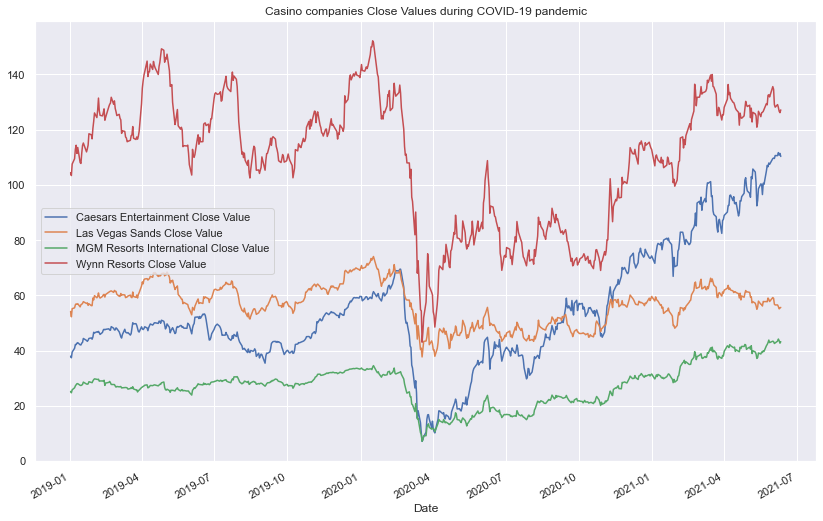

In [19]:
plt.figure(figsize=(14, 9))
ax = plt.gca()
Caesars_Entertainment.plot(x='Date', y='Caesars Entertainment Close Value', ax = ax)
Las_Vegas_Sands.plot(x='Date', y='Las Vegas Sands Close Value', ax = ax)
MGM_Resorts_International.plot(x='Date', y='MGM Resorts International Close Value', ax = ax)
Wynn_Resorts.plot(x='Date', y='Wynn Resorts Close Value', ax = ax)
plt.title('Casino companies Close Values during COVID-19 pandemic')
plt.savefig('figures/casinos.png')
plt.show()

## Hotels, Resorts, & Cruise Lines

In [20]:
hotels_cruises = sp_data[sp_data['Ticker'].isin(['CCL', 'HLT', 'MAR', 'NCLH', 'RCL'])]
hotels_cruises.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
232522,CCL,2009-12-31,32.189999,31.670000,32.160000,31.690001,1987700.0,23.617012
232523,CCL,2010-01-04,32.759998,31.959999,32.290001,32.060001,5372700.0,23.892752
232524,CCL,2010-01-05,32.540001,32.200001,32.279999,32.369999,3199900.0,24.123785
232525,CCL,2010-01-06,32.570000,31.750000,32.290001,31.790001,6171400.0,23.691536
232526,CCL,2010-01-07,32.360001,31.900000,32.119999,32.139999,3469400.0,23.952377


In [21]:
hotels_cruises['Ticker'].unique()

array(['CCL', 'HLT', 'MAR', 'NCLH', 'RCL'], dtype=object)

In [22]:
end_date = pd.to_datetime('2018-12-31')

hotels_cruises = hotels_cruises[hotels_cruises['Date'] > end_date]
hotels_cruises.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
234787,CCL,2019-01-02,50.099998,48.619999,48.939999,49.849998,3926800.0,47.317493
234788,CCL,2019-01-03,49.410000,47.330002,49.270000,47.369999,6128200.0,44.963486
234789,CCL,2019-01-04,50.419998,48.330002,48.439999,50.049999,4568300.0,47.507336
234790,CCL,2019-01-07,51.240002,50.330002,51.009998,50.639999,4694900.0,48.067360
234791,CCL,2019-01-08,52.520000,51.480000,52.400002,51.900002,5776400.0,49.263348


In [23]:
Carnival_Corporation = hotels_cruises[hotels_cruises['Ticker']=='CCL']
Hilton_Worldwide = hotels_cruises[hotels_cruises['Ticker']=='HLT']
Marriott_International = hotels_cruises[hotels_cruises['Ticker']=='MAR']
Norwegian_Cruise_Line_Holdings = hotels_cruises[hotels_cruises['Ticker']=='NCLH']
Royal_Caribbean_Group = hotels_cruises[hotels_cruises['Ticker']=='RCL']

Carnival_Corporation = Carnival_Corporation.rename(columns={'Close':'Carnival Corporation Close Value'})
Hilton_Worldwide = Hilton_Worldwide.rename(columns={'Close':'Hilton Worldwide Close Value'})
Marriott_International = Marriott_International.rename(columns={'Close':'Marriott International Close Value'})
Norwegian_Cruise_Line_Holdings = Norwegian_Cruise_Line_Holdings.rename(columns={'Close':'Norwegian Cruise Line Close Value'})
Royal_Caribbean_Group = Royal_Caribbean_Group.rename(columns={'Close':'Royal Caribbean Close Value'})

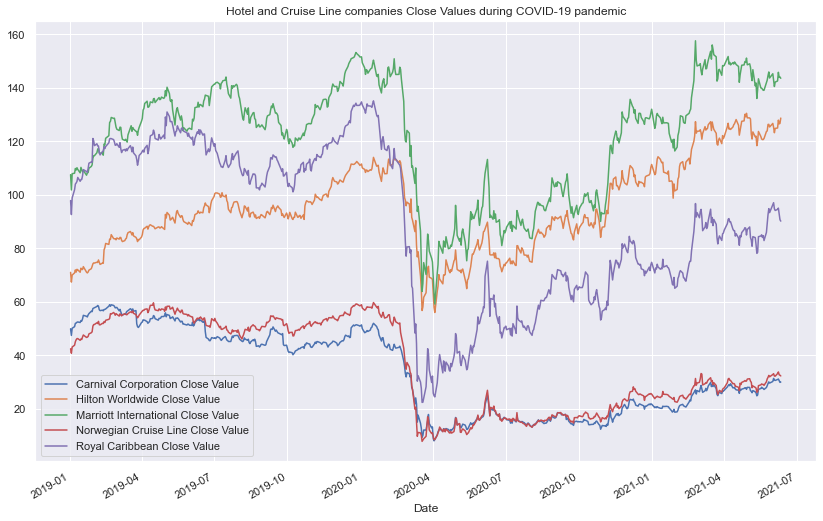

In [24]:
plt.figure(figsize=(14, 9))
ax = plt.gca()
Carnival_Corporation.plot(x='Date', y='Carnival Corporation Close Value', ax = ax)
Hilton_Worldwide.plot(x='Date', y='Hilton Worldwide Close Value', ax = ax)
Marriott_International.plot(x='Date', y='Marriott International Close Value', ax = ax)
Norwegian_Cruise_Line_Holdings.plot(x='Date', y='Norwegian Cruise Line Close Value', ax = ax)
Royal_Caribbean_Group.plot(x='Date', y='Royal Caribbean Close Value', ax = ax)
plt.title('Hotel and Cruise Line companies Close Values during COVID-19 pandemic')
plt.savefig('figures/hotels_cruises.png')
plt.show()

## Internet & Direct Marketing Retail

In [25]:
internet = sp_data[sp_data['Ticker'].isin(['AMZN', 'EBAY', 'ETSY'])]
internet.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
98506,AMZN,2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000.0,134.520004
98507,AMZN,2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900.0,133.899994
98508,AMZN,2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900.0,134.690002
98509,AMZN,2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800.0,132.250000
98510,AMZN,2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200.0,130.000000


In [26]:
internet['Ticker'].unique()

array(['AMZN', 'EBAY', 'ETSY'], dtype=object)

In [27]:
end_date = pd.to_datetime('2018-12-31')

internet = internet[internet['Date'] > end_date]
internet.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
100771,AMZN,2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100.0,1539.130005
100772,AMZN,2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600.0,1500.280029
100773,AMZN,2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600.0,1575.390015
100774,AMZN,2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200.0,1629.510010
100775,AMZN,2019-01-08,1676.609985,1616.609985,1664.689941,1656.579956,8881400.0,1656.579956


In [28]:
Amazon = internet[internet['Ticker']=='AMZN']
eBay = internet[internet['Ticker']=='EBAY']
Etsy = internet[internet['Ticker']=='ETSY']

Amazon = Amazon.rename(columns={'Close':'Amazon Close Value'})
eBay = eBay.rename(columns={'Close':'eBay Close Value'})
Etsy = Etsy.rename(columns={'Close':'Etsy Close Value'})

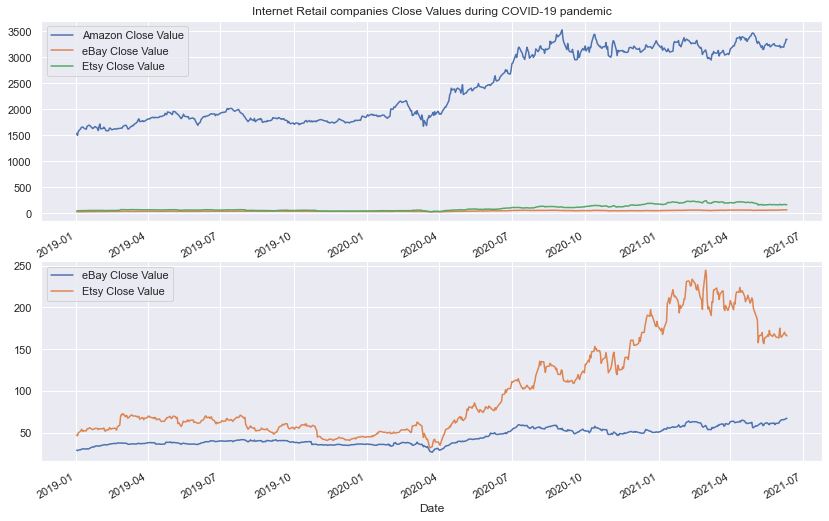

In [29]:
plt.subplots(figsize=(14, 9))
plt.subplot(2,1,1)
ax = plt.gca()
Amazon.plot(x='Date', y='Amazon Close Value', ax = ax)
eBay.plot(x='Date', y='eBay Close Value', ax = ax)
Etsy.plot(x='Date', y='Etsy Close Value', ax = ax)
plt.title('Internet Retail companies Close Values during COVID-19 pandemic')
plt.subplot(2,1,2)
ax = plt.gca()
eBay.plot(x='Date', y='eBay Close Value', ax = ax)
Etsy.plot(x='Date', y='Etsy Close Value', ax = ax)
plt.savefig('figures/internet_retail.png')
plt.show()

## Movies & Entertainment

In [30]:
entertainment = sp_data[sp_data['Ticker'].isin(['LYV', 'NFLX', 'DIS'])]
entertainment.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
369799,DIS,2009-12-31,32.750000,32.220001,32.27,32.25,19651700.0,28.090706
369800,DIS,2010-01-04,32.750000,31.870001,32.50,32.07,13700400.0,27.933924
369801,DIS,2010-01-05,32.160000,31.700001,32.07,31.99,10307700.0,27.864237
369802,DIS,2010-01-06,32.000000,31.680000,31.90,31.82,10709500.0,27.716166
369803,DIS,2010-01-07,31.860001,31.540001,31.77,31.83,8202100.0,27.724878


In [31]:
entertainment['Ticker'].unique()

array(['DIS', 'LYV', 'NFLX'], dtype=object)

In [32]:
end_date = pd.to_datetime('2018-12-31')

entertainment = entertainment[entertainment['Date'] > end_date]
entertainment.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
372064,DIS,2019-01-02,109.139999,107.730003,108.099998,108.970001,9723500.0,107.654343
372065,DIS,2019-01-03,108.650002,105.940002,108.480003,106.330002,10594700.0,105.046211
372066,DIS,2019-01-04,110.750000,107.250000,107.940002,109.610001,10122800.0,108.286606
372067,DIS,2019-01-07,111.400002,109.300003,109.910004,110.559998,6714700.0,109.225136
372068,DIS,2019-01-08,112.559998,111.169998,111.800003,111.419998,8730700.0,110.074753


In [33]:
Live_Nation = entertainment[entertainment['Ticker']=='LYV']
Netflix = entertainment[entertainment['Ticker']=='NFLX']
Walt_Disney = entertainment[entertainment['Ticker']=='DIS']

Live_Nation = Live_Nation.rename(columns={'Close':'Live Nation Close Value'})
Netflix = Netflix.rename(columns={'Close':'Netflix Close Value'})
Walt_Disney = Walt_Disney.rename(columns={'Close':'Walt_Disney Close Value'})

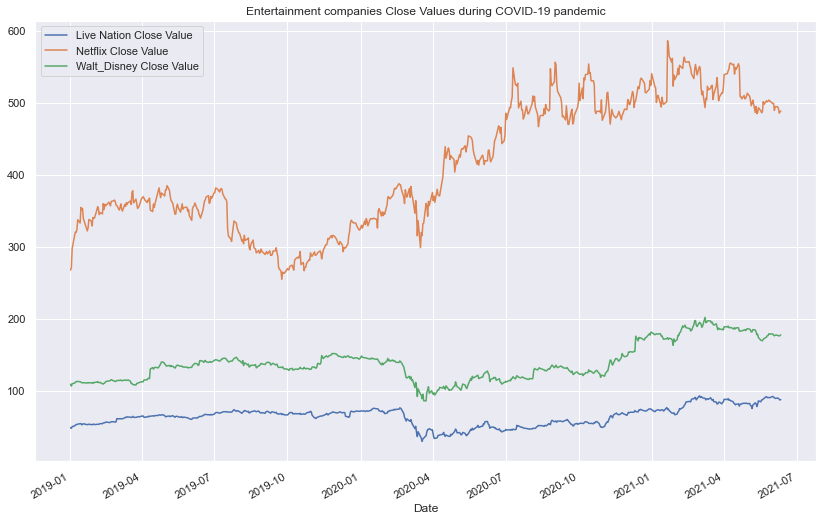

In [34]:
plt.figure(figsize=(14, 9))
ax = plt.gca()
Live_Nation.plot(x='Date', y='Live Nation Close Value', ax = ax)
Netflix.plot(x='Date', y='Netflix Close Value', ax = ax)
Walt_Disney.plot(x='Date', y='Walt_Disney Close Value', ax = ax)
plt.title('Entertainment companies Close Values during COVID-19 pandemic')
plt.savefig('figures/entertainment.png')
plt.show()